#### Define Meta-Parameters
##### Meta-Parameters

In [1]:
N_Reconfigurations = 10**2
d = 1 # Dimension of X
D = 1 # Dimension of Y

# Data Meta-Parameters
noise_level = 0.1
uncertainty_level= 0.9

# Training meta-parameters
Epochs = 10**1

##### Simulation Meta-Parameters

In [2]:
# Number of Datapoints
N_data = 10**2
# Unknown Function
def unknown_f(x):
    return np.sin(np.sin(x))

#### Generate Data

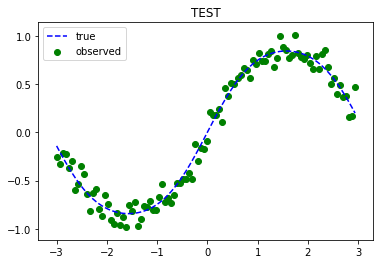

In [4]:
%run Data_Generator.ipynb # Exectute temporary training Parameters

#### Define NEU-OLS

In [5]:
%run NEU_Backend.ipynb

Using TensorFlow backend.


TensorFlow: 2.1.0
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 2)                 0         
_________________________________________________________________
reconfiguration_unit_1 (Reco (None, 2)                 10        
_________________________________________________________________
reconfiguration_unit_2 (Reco (None, 2)                 10        
_________________________________________________________________
reconfiguration_unit_3 (Reco (None, 2)                 10        
_________________________________________________________________
reconfiguration_unit_4 (Reco (None, 2)                 10        
_________________________________________________________________
reconfiguration_unit_5 (Reco (None, 2)                 10        
_________________________________________________________________
reconfiguration_unit_6 (Reco (None, 2)   

### Compile NEU_OLS

In [6]:
NEU_OLS.compile(loss='mse',
                optimizer="SGD",
                metrics=['mae', 'mse'])

### Fit NEU OLS

In [7]:
history = NEU_OLS.fit(
  data_NEU, data_y,
  epochs=Epochs)

Epoch 1/10
100/100 [==============================] - 67s 672ms/step - loss: 0.1323 - mae: 0.3239 - mse: 0.1323
Epoch 2/10
100/100 [==============================] - 0s 3ms/step - loss: 0.1323 - mae: 0.3239 - mse: 0.1323
Epoch 3/10
100/100 [==============================] - 0s 3ms/step - loss: 0.1323 - mae: 0.3239 - mse: 0.1323
Epoch 4/10
100/100 [==============================] - 0s 3ms/step - loss: 0.1323 - mae: 0.3239 - mse: 0.1323
Epoch 5/10
100/100 [==============================] - 0s 3ms/step - loss: 0.1323 - mae: 0.3239 - mse: 0.1323
Epoch 6/10
100/100 [==============================] - 0s 3ms/step - loss: 0.1323 - mae: 0.3239 - mse: 0.1323
Epoch 7/10
100/100 [==============================] - 0s 3ms/step - loss: 0.1323 - mae: 0.3239 - mse: 0.1323
Epoch 8/10
100/100 [==============================] - 0s 3ms/step - loss: 0.1323 - mae: 0.3239 - mse: 0.1323
Epoch 9/10
100/100 [==============================] - 0s 3ms/step - loss: 0.1323 - mae: 0.3239 - mse: 0.1323
Epoch 10/10
100/

In [13]:
NEU_prediction = NEU_OLS.predict(data_NEU)

### Evaluate Benchmark Regression Models

In [9]:
%run Regression_Benchmark_Models.ipynb

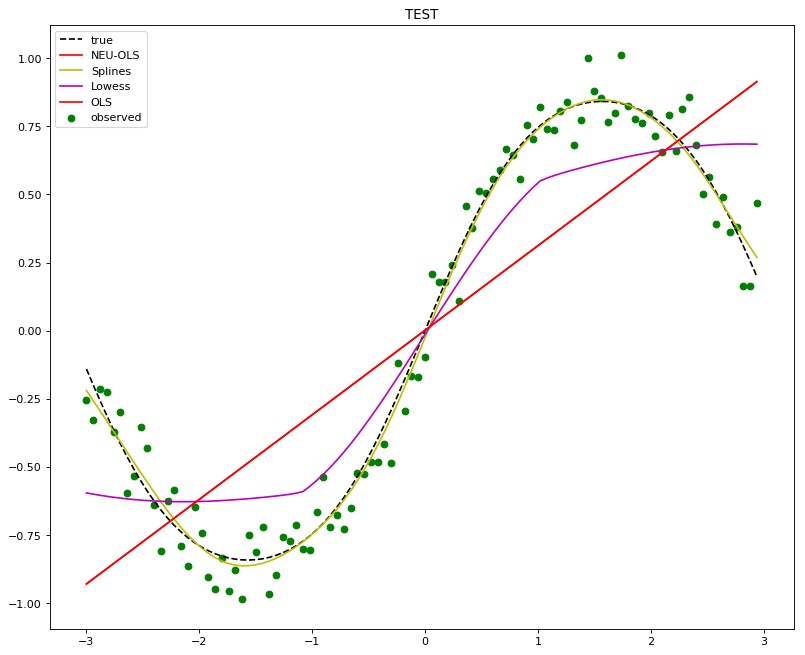

In [11]:
# import matplotlib.pyplot as plt
# Adjust Figure Details
plt.figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')

# Plot Models
plt.plot(data_x,true_y,color='k',label='true',linestyle='--')
plt.plot(data_x,NEU_prediction,color='b',label='NEU-OLS')
plt.plot(data_x,f_hat_smoothing_splines,color='y',label='Splines')
plt.plot(data_x,f_hat_lowess,color='m',label='Lowess')
plt.plot(data_x,model_pred_y,color='r',label='OLS')

# Add Legends
plt.scatter(data_x,data_y,color='g',label='observed')
plt.legend(loc="upper left")
plt.title("TEST")
plt.show()